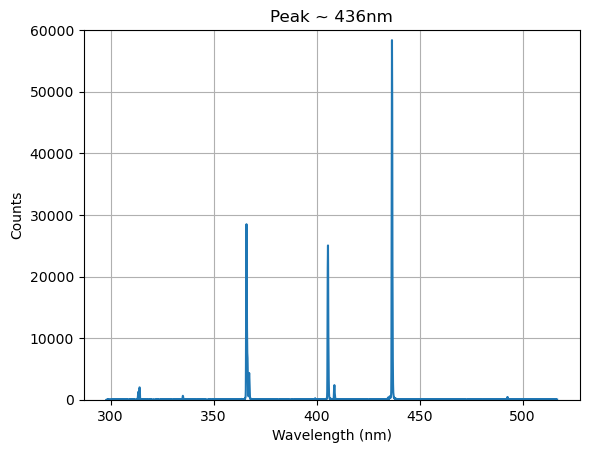

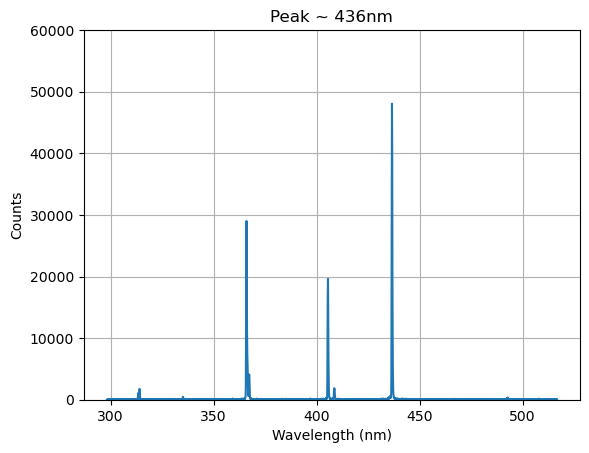

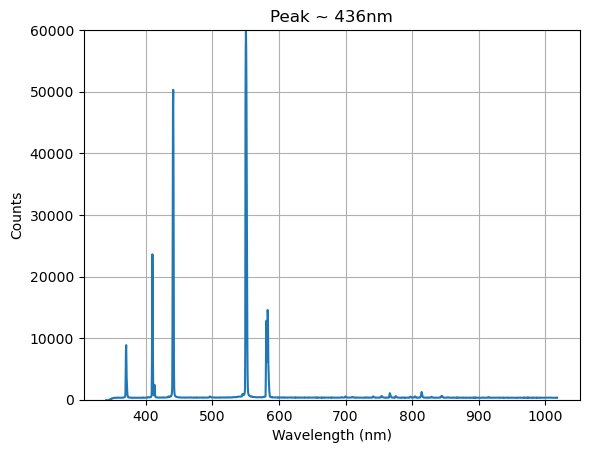

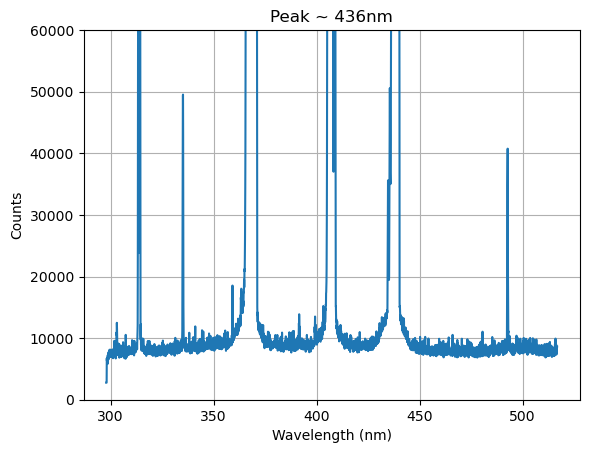

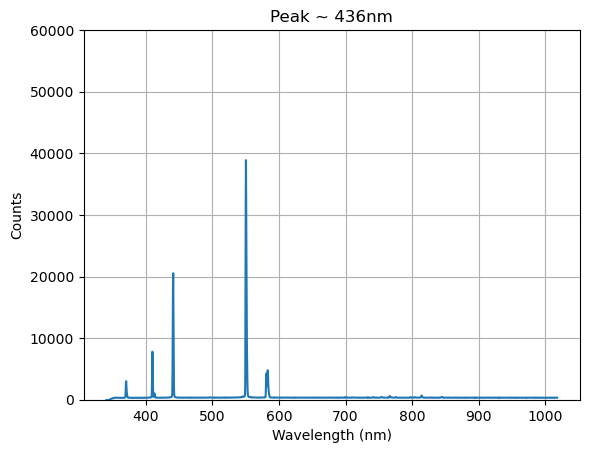

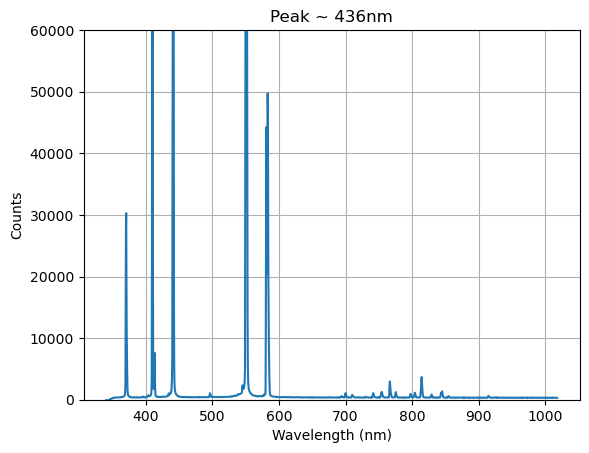

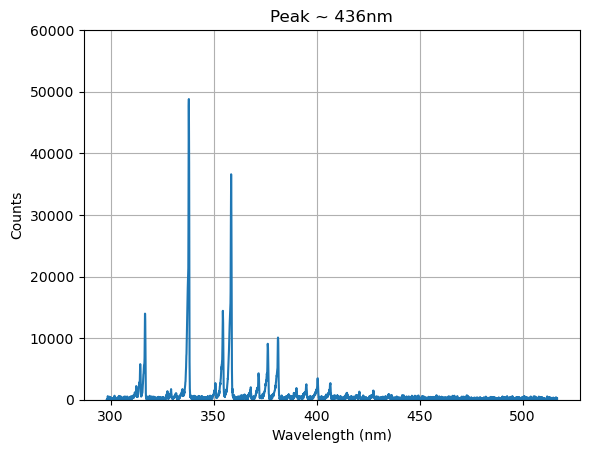

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define file paths and names
file_paths = {
    'MercTEDark': '/home/dj-lawton/Documents/Junior Sophister/JS Labs/Molecular Spectroscopy/Exp1/MercuryDarkClose1_FLMT016052_11-57-24-770.txt',
    'MercTNoEDark': '/home/dj-lawton/Documents/Junior Sophister/JS Labs/Molecular Spectroscopy/Exp1/MercuryNoDarkClose1_FLMT016052_11-33-03-669.txt',
    'MercSSpec': '/home/dj-lawton/Documents/Junior Sophister/JS Labs/Molecular Spectroscopy/Exp1/MercuryS_FLMS043641_12-39-11-815.txt',
    'MercTSaturated': '/home/dj-lawton/Documents/Junior Sophister/JS Labs/Molecular Spectroscopy/Exp1/MercurySATURATED_FLMT016052_11-30-39-931.txt',
    'MercS_big': '/home/dj-lawton/Documents/Junior Sophister/JS Labs/Molecular Spectroscopy/Exp1/MercurySBigPeaks_FLMS043641_12-36-23-480.txt',
    'MercS_small': '/home/dj-lawton/Documents/Junior Sophister/JS Labs/Molecular Spectroscopy/Exp1/MercurySSmallPeaks_FLMS043641_12-37-59-611.txt',
    'N2_Big': '/home/dj-lawton/Documents/Junior Sophister/JS Labs/Molecular Spectroscopy/Exp2/N2TBigPeaks_FLMT016052_12-53-00-515.txt',
}

# Load the data into a dictionary
data_frames = {name: pd.read_csv(path, delim_whitespace=True, names=['Wavelength', 'Counts']) for name, path in file_paths.items()}

sorted_data_frames = {name: df.sort_values(by='Counts') for name, df in data_frames.items()}

# Print the data frames
# for name, df in sorted_data_frames.items():
#     print(f"{name}:(Sorted by Count)\n{df}\n")


# Example usage of one of the data frames
for name, df in data_frames.items():
    plt.plot(df['Wavelength'], df['Counts'], label=name)
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Counts')
    plt.title('Peak ~ 436nm')
    plt.grid()
    # plt.xlim(434, 440)
    plt.ylim(0, 60000)
    plt.show()
    plt.close()

     Wavelength     Counts
216     313.053   440.7521
217     313.122   674.2206
218     313.192   721.0313
219     313.262   766.3792
220     313.331   849.1756
221     313.401  1139.6946
222     313.471  1207.2776
223     313.541  1386.3286
224     313.610  1927.8700
225     313.680  2100.1920
226     313.750  2280.9983
[3.42481353e+05 1.49032574e+00 3.18452062e+02] [[3.38725123e+13 1.32909304e+07 8.85902301e+07]
 [1.32909304e+07 5.22308044e+00 3.47872228e+01]
 [8.85902301e+07 3.47872228e+01 2.31784607e+02]]


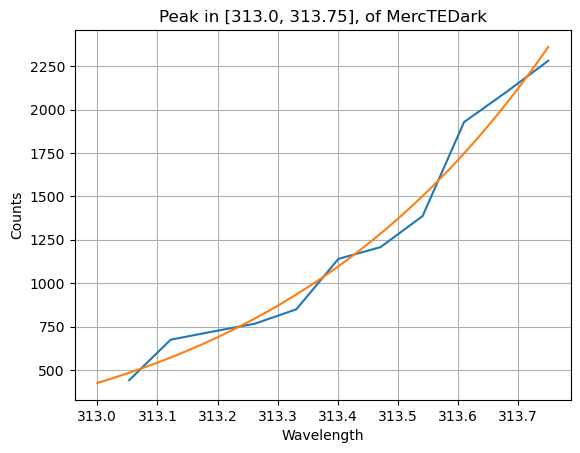

In [2]:
import numpy as np
from scipy.optimize import curve_fit

def gaussian(x, a, b, c):
    return a * np.exp(-(x - c)**2/(2*b**2))


def fit_gaussian(df_, q):
    params, covar = curve_fit(gaussian, df_['Wavelength'], df_['Counts'], p0=q, maxfev=1000000)
    return params, covar

def fitpeakfunc(df, ranges, name):
    df_is = (df['Wavelength']>=ranges[0]) & (df['Wavelength']<=ranges[1])
    df = df[df_is]
    mean = sum(df['Counts']*df['Wavelength'])/sum(df['Counts'])
    sig = np.sqrt(sum(df['Counts']*(df['Wavelength']-mean)**2)/sum(df['Counts']))
    q = [max(df['Counts']),sig, mean]
    print(df)
    params, covar = fit_gaussian(df, q)
    print(params, covar)
    plt.figure()
    plt.plot(df['Wavelength'], df['Counts'], label='Data')
    plt.plot(np.linspace(ranges[0], ranges[1], 10*len(df)), gaussian(np.linspace(ranges[0], ranges[1], 10*len(df)), *params), label='Fit')
    # plt.fill_between(df['Wavelength'], gaussian(df['Wavelength'], *params-(np.diag(covar))^2), gaussian(df['Wavelength'], *params+(np.diag(covar))^2), alpha=0.5)
    plt.xlabel('Wavelength')
    plt.ylabel('Counts')
    plt.title(f'Peak in {ranges}, of {name}')
    plt.grid()
    # plt.savefig(f'Peak in {ranges}, of {name}.png')
    plt.show()

    return params, covar

q = fitpeakfunc(data_frames['N2_Big'], [313., 313.75], 'MercTEDark')

Identified peaks at indices: [ 230 1001 1021 1628 1679 2149]
     Wavelength     Counts
210     312.634    10.3252
211     312.704    22.6130
212     312.774   -48.0419
213     312.843    62.5484
214     312.913    31.8288
215     312.983    76.8842
216     313.053   -64.4257
217     313.122   126.0354
218     313.192   177.2346
219     313.262   616.5239
220     313.331  1114.1803
221     313.401  1266.7540
222     313.471  1288.2577
223     313.541  1168.4515
224     313.610   778.3135
225     313.680   269.3932
226     313.750   148.5631
227     313.819   493.6458
228     313.889  1264.7060
229     313.959  1910.8402
230     314.028  2007.0947
231     314.098  1979.4471
232     314.168  1638.4603
233     314.237   878.6639
234     314.307   221.2660
235     314.376   109.6517
236     314.446    62.5484
237     314.516    16.4691
238     314.585   -16.2984
239     314.655   -20.3944
240     314.724     8.2772
241     314.794    29.7809
242     314.864    42.0687
243     314.933     2

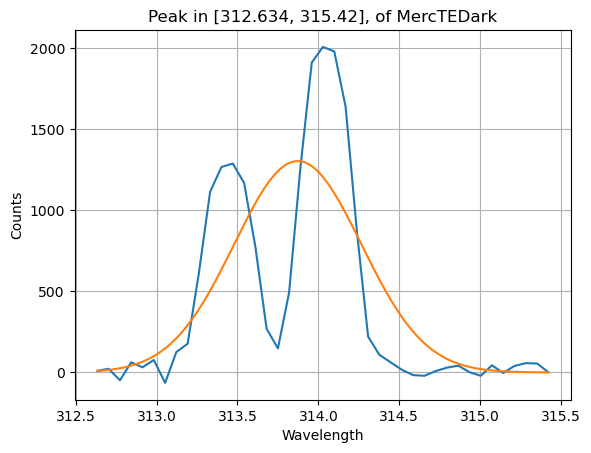

      Wavelength   Counts
717      347.230  42.0687
718      347.296  37.9728
719      347.363   8.2772
720      347.430 -16.2984
721      347.496  33.8768
...          ...      ...
1281     383.886  -5.0346
1282     383.949 -34.7301
1283     384.013 -65.4497
1284     384.076 -11.1785
1285     384.139   5.2053

[569 rows x 2 columns]
[2.77474055e+04 1.86918192e-01 3.65950611e+02] [[ 1.40585889e+05 -6.31933652e-01 -1.77480829e-03]
 [-6.31933652e-01  8.52949323e-06  5.88910566e-09]
 [-1.77480829e-03  5.88910566e-09  8.52614082e-06]]


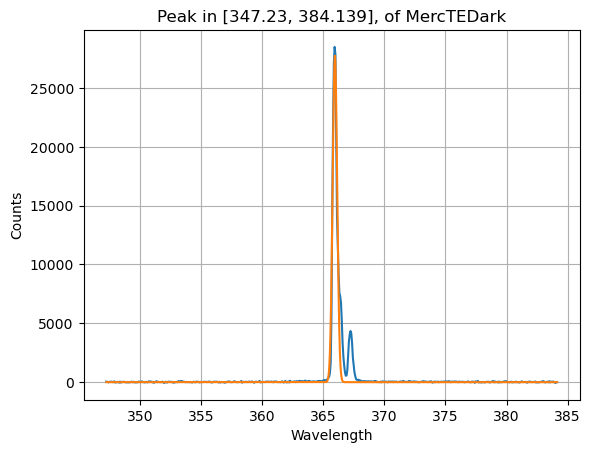

      Wavelength    Counts
978      364.432   38.9967
979      364.497   67.6683
980      364.563   95.3159
981      364.628   76.8842
982      364.693  109.6517
...          ...       ...
1060     369.752  -17.3224
1061     369.817   58.4524
1062     369.881   69.7163
1063     369.946   26.7089
1064     370.010   42.0687

[87 rows x 2 columns]
[2.77474707e+04 1.86917314e-01 3.65950610e+02] [[ 9.44553916e+05 -4.24570141e+00 -1.19245241e-02]
 [-4.24570141e+00  5.73052092e-05  3.95665074e-08]
 [-1.19245241e-02  3.95665074e-08  5.72826807e-05]]


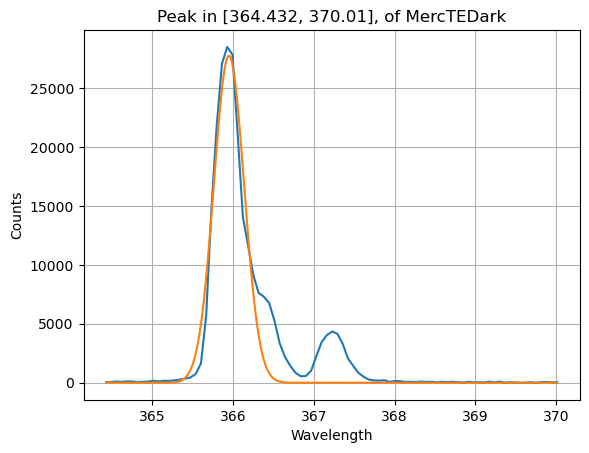

      Wavelength   Counts
1378     389.996  27.7329
1379     390.059  20.5650
1380     390.122  60.5004
1381     390.185 -12.2025
1382     390.247  49.2366
...          ...      ...
1874     420.351 -16.2984
1875     420.410  10.3252
1876     420.470  95.3159
1877     420.530 -13.2265
1878     420.589  34.9008

[501 rows x 2 columns]
[ 2.50261080e+04 -1.66109103e-01  4.05456323e+02] [[3.40132192e+04 1.50263473e-01 4.13062543e-04]
 [1.50263473e-01 1.99802799e-06 3.79654732e-09]
 [4.13062543e-04 3.79654732e-09 2.00456280e-06]]


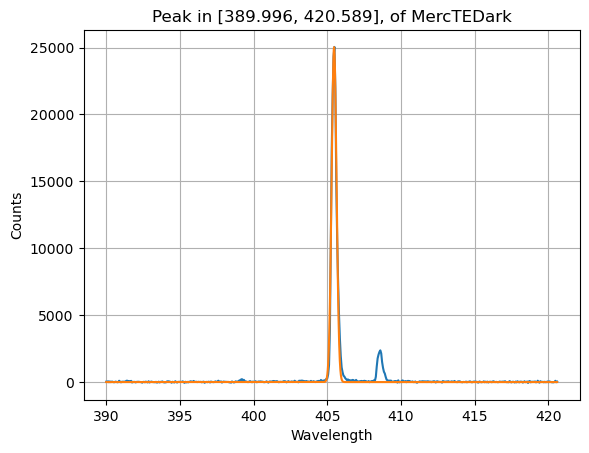

      Wavelength     Counts
1656     407.193    67.6683
1657     407.254    71.7642
1658     407.315    84.0521
1659     407.376    65.6203
1660     407.437    31.8288
1661     407.498    95.3159
1662     407.559    78.9321
1663     407.620    70.7403
1664     407.681    23.6370
1665     407.742    22.6130
1666     407.803    74.8362
1667     407.864    -7.0826
1668     407.925    37.9728
1669     407.986    59.4764
1670     408.047    86.1000
1671     408.108    58.4524
1672     408.168   134.2273
1673     408.229   101.4598
1674     408.290   393.2953
1675     408.351  1157.1877
1676     408.412  1772.6023
1677     408.473  2052.1500
1678     408.534  2250.8030
1679     408.595  2369.5852
1680     408.656  2142.2606
1681     408.716  1493.0546
1682     408.777  1070.1490
1683     408.838   773.1935
1684     408.899   638.0276
1685     408.960   385.1035
1686     409.021   178.2586
1687     409.082   132.1793
1688     409.142   104.5317
1689     409.203   106.5797
1690     409.264   1

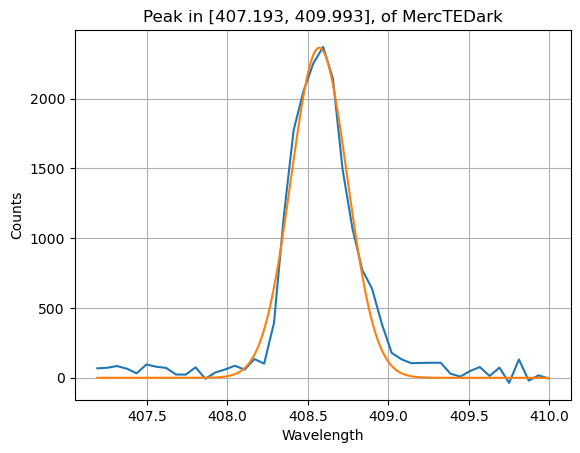

      Wavelength   Counts
1566     401.677  -6.0586
1567     401.739  -4.0106
1568     401.800  30.8049
1569     401.862  -0.9387
1570     401.923  23.6370
...          ...      ...
2728     469.124 -30.6342
2729     469.179 -14.2504
2730     469.233  10.3252
2731     469.288   5.2053
2732     469.342 -34.7301

[1167 rows x 2 columns]
[5.83675544e+04 1.60591671e-01 4.36549356e+02] [[ 8.51218931e+05 -1.55913892e+00  3.83657830e-03]
 [-1.55913892e+00  8.58607861e-06  4.68087815e-09]
 [ 3.83657830e-03  4.68087815e-09  8.60761305e-06]]


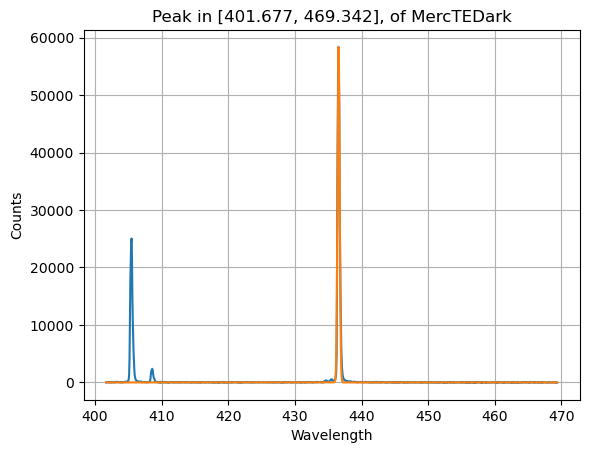

In [3]:
from scipy.signal import find_peaks

def identify_and_fit_peaks(df, name, height=None, distance=None, prominence=None):
    # Identify peaks
    peaks, properties = find_peaks(df['Counts'], height=height, distance=distance, prominence=1000)
    print(f"Identified peaks at indices: {peaks}")
    sigma_list = []
    mean_list = []
    mean_error_list = []
    # Fit Gaussian to each identified peak
    for peak in peaks:
        peak_height = properties['peak_heights'][np.where(peaks == peak)][0]
        range_width = peak_height / 100  # Adjust this factor as needed
        peak_range = [df['Wavelength'].iloc[max(0, peak-int(range_width))], df['Wavelength'].iloc[min(len(df)-1, peak+int(range_width))]]
        params, covar = fitpeakfunc(df, peak_range, name)
        sigma_list.append(params[1])
        mean_list.append(params[2])
        mean_error_list.append(np.sqrt(covar[2,2]))

    
    return sigma_list, mean_list, mean_error_list
    

sigma, mean, meanErr = identify_and_fit_peaks(data_frames['MercTEDark'], 'MercTEDark', height=1000, distance=10, prominence=1000)
# Create a dictionary with the variables
data = {'sigma': sigma, 'mean': mean, 'meanErr': meanErr}
# Create a DataFrame from the dictionary
df = pd.DataFrame(data)
# Save the DataFrame to a CSV file
df.to_csv('output.csv', index=False)